In [32]:
import Pkg
Pkg.add("DataFrames")
Pkg.add("CausalInference")
Pkg.add("Graphs")
Pkg.add("Test")
Pkg.add("Statistics")
Pkg.add("CairoMakie")
Pkg.add("GraphMakie")
Pkg.add("StatsModels")

   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.

In [33]:
using DataFrames, CausalInference, StatsModels
using Graphs
using Test
using Random
using Statistics
using CairoMakie
using GraphMakie
using GLM

In [10]:
#De https://juliadynamics.github.io/CausalityTools.jl/dev/examples/examples_graphs/
function plotgraph(g)
    f, ax, p = graphplot(g,
        nlabels = repr.(1:nv(g)),
        nlabels_color = [:red for i in 1:nv(g)],
    )
    offsets = 0.05 * (p[:node_pos][] .- p[:node_pos][][1])
    offsets[1] = Point2f(0, 0.2)
    p.nlabels_offset[] = offsets
    autolimits!(ax)
    hidedecorations!(ax)
    hidespines!(ax)
    ax.aspect = DataAspect()
    return f
end

plotgraph (generic function with 1 method)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.698987   0.0242438  28.83    <1e-99  0.651412    0.746562
X            0.139133   0.0215663   6.45    <1e-09  0.0968122   0.181453
────────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t

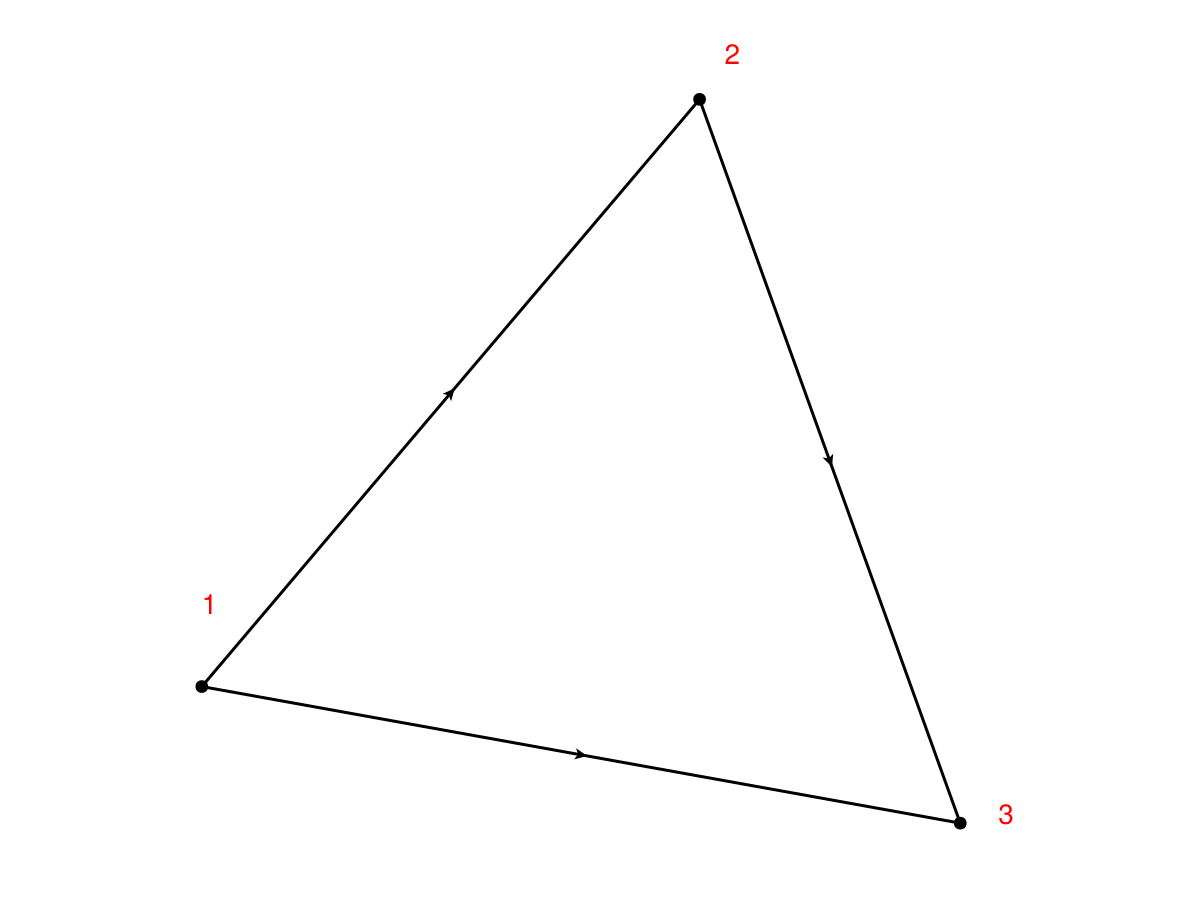

In [50]:
#Setting the Seed
Random.seed!(123)

#Modelo 1
pgd1 = (Z = rand(1000))
pgd2 = (X = rand(1000) + 0.5*pgd2)
pgd3 = (Y = rand(1000) + 0.1*X+0.3*pgd3)


matrix_data_all = [DataFrame(Y = pgd3) DataFrame(X = pgd2) DataFrame(Z =pgd1)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X+Z), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([ (1, 3), (1,2), (2, 3)])
g = SimpleDiGraph(el)
plotgraph(g)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  4.73106     0.133063  35.55    <1e-99   4.46994    4.99217
X            0.206246    0.16237    1.27    0.2043  -0.112381   0.524872
────────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|

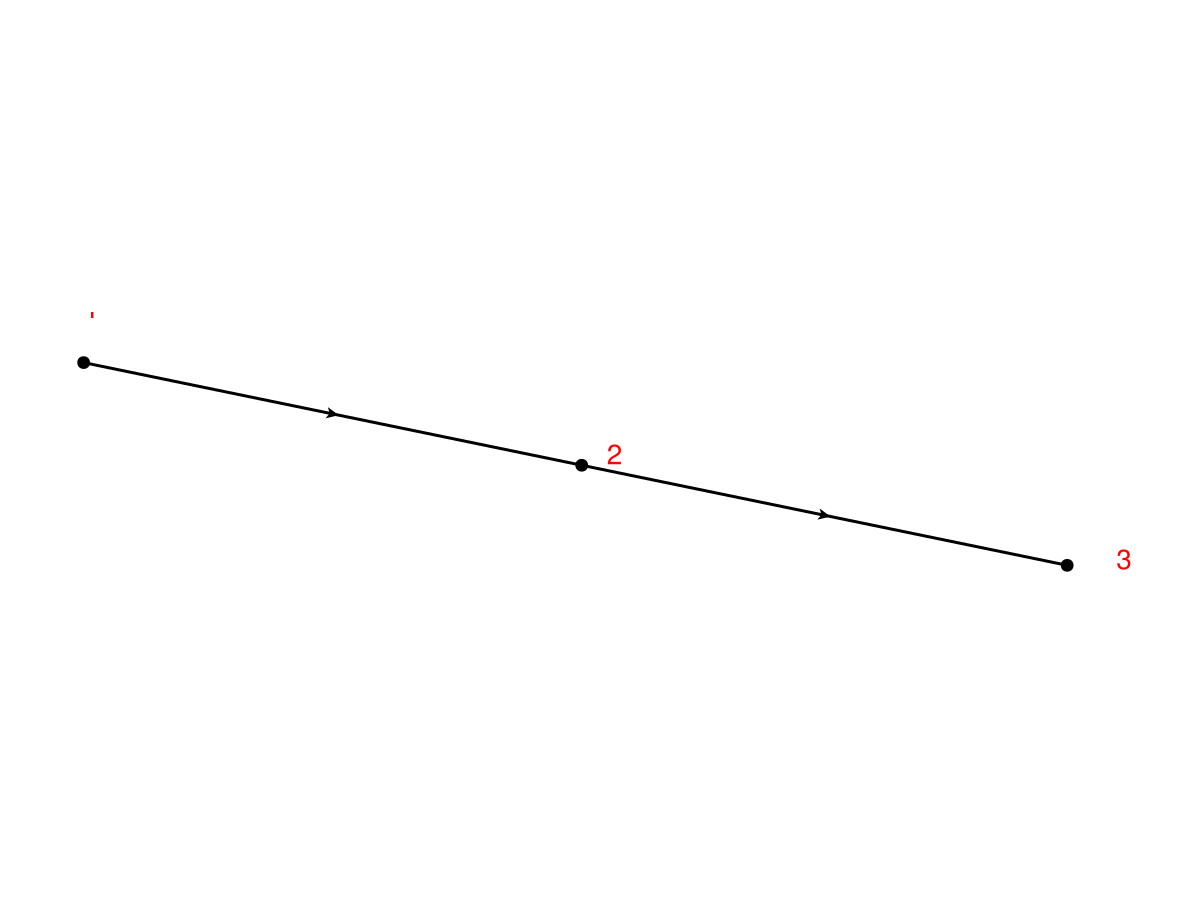

In [52]:
#Modelo 2
pgd1 = (Z = rand(1000))
pgd2 = (X = rand(1000) + 0.5*pgd1)
pgd3 = (Y = rand(1000) + 2*pgd3)


matrix_data_all = [DataFrame(Y = pgd3) DataFrame(X = pgd2) DataFrame(Z =pgd1)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X+Z), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([ (1, 2), (2, 3)])
g = SimpleDiGraph(el)
plotgraph(g)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  1.79669   0.0603022  29.79    <1e-99    1.67836    1.91503
X            1.67652   0.0760116  22.06    <1e-87    1.52736    1.82568
───────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lowe

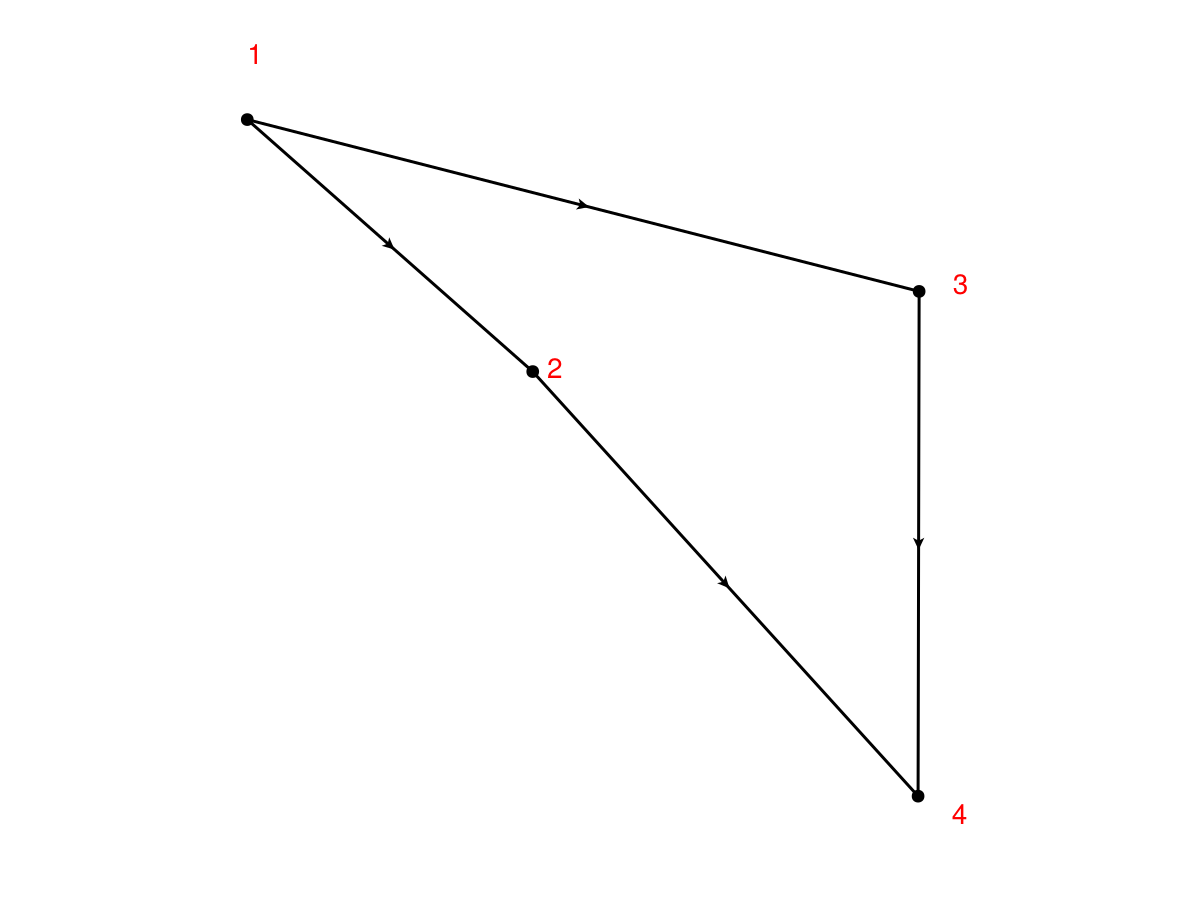

In [63]:
#Modelo 3
pgd1 = (U = rand(1000))
pgd2 = (Z = rand(1000) + 0.8*pgd1)
pgd3 = (X = rand(1000) + 0.5*pgd1)
pgd4 = (Y = rand(1000) + 2*pgd2 + pgd3)

matrix_data_all = [DataFrame(Y = pgd4) DataFrame(X = pgd3) DataFrame(Z =pgd2)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X+Z), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([(1,2),(1,3),(2,4),(3,4)])
g = SimpleDiGraph(el)
plotgraph(g)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.489167   0.029037   16.85    <1e-55   0.432186   0.546147
X            1.00756    0.0165333  60.94    <1e-99   0.975121   1.04001
────────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z + U

Coefficients:
──────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  P

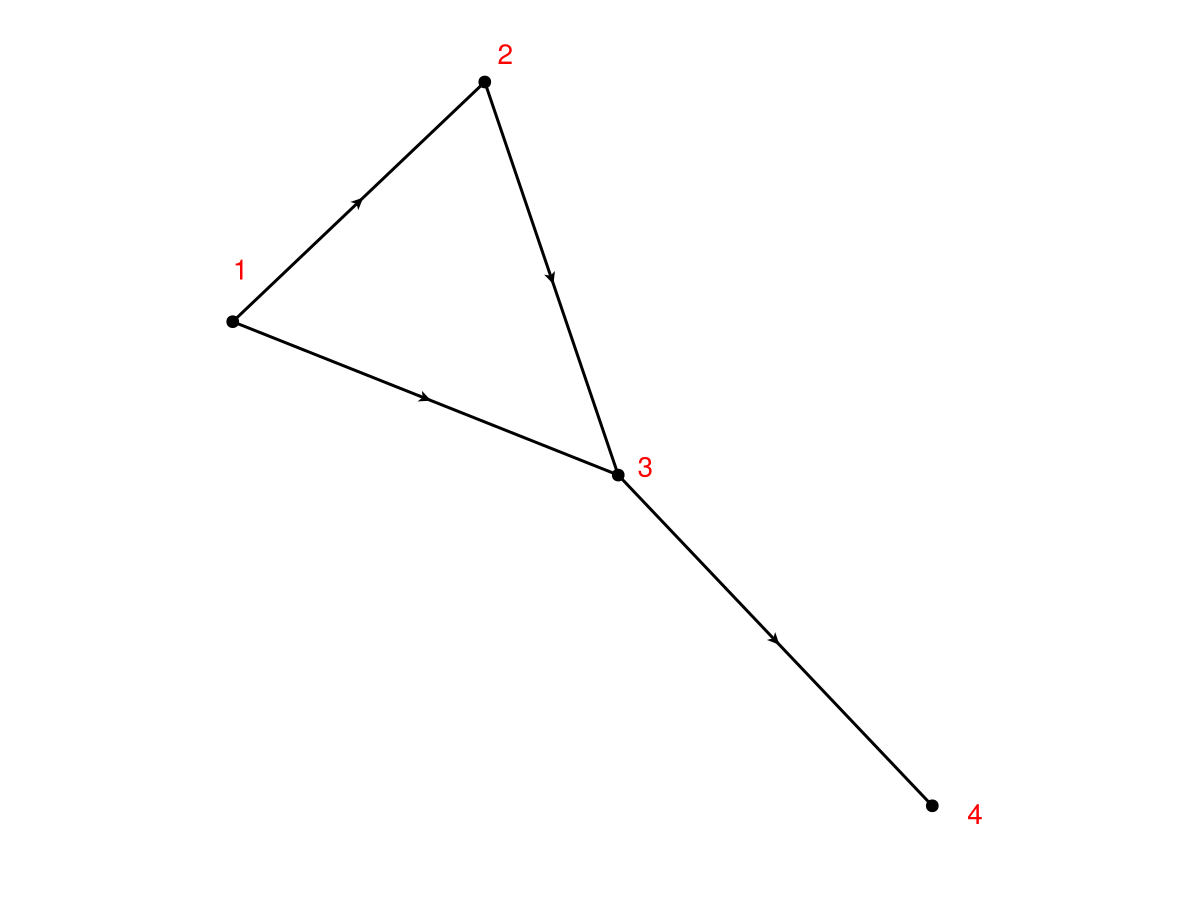

In [66]:
#Modelo 4
pgd1 = (U = rand(1000))
pgd2 = (Z = rand(1000) + 0.8*pgd1)
pgd3 = (X = rand(1000) + 0.5*pgd1 + pgd2)
pgd4 = (Y = rand(1000) + pgd3)

matrix_data_all = [DataFrame(Y = pgd4) DataFrame(X = pgd3) DataFrame(Z =pgd2) DataFrame(U = pgd1)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X+Z+U), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([(1,2),(2,3),(1,3),(3,4)])
g = SimpleDiGraph(el)
plotgraph(g)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  1.17777   0.0678189  17.37    <1e-58    1.04468    1.31085
X            1.80526   0.063079   28.62    <1e-99    1.68147    1.92904
───────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z + M

Coefficients:
──────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t

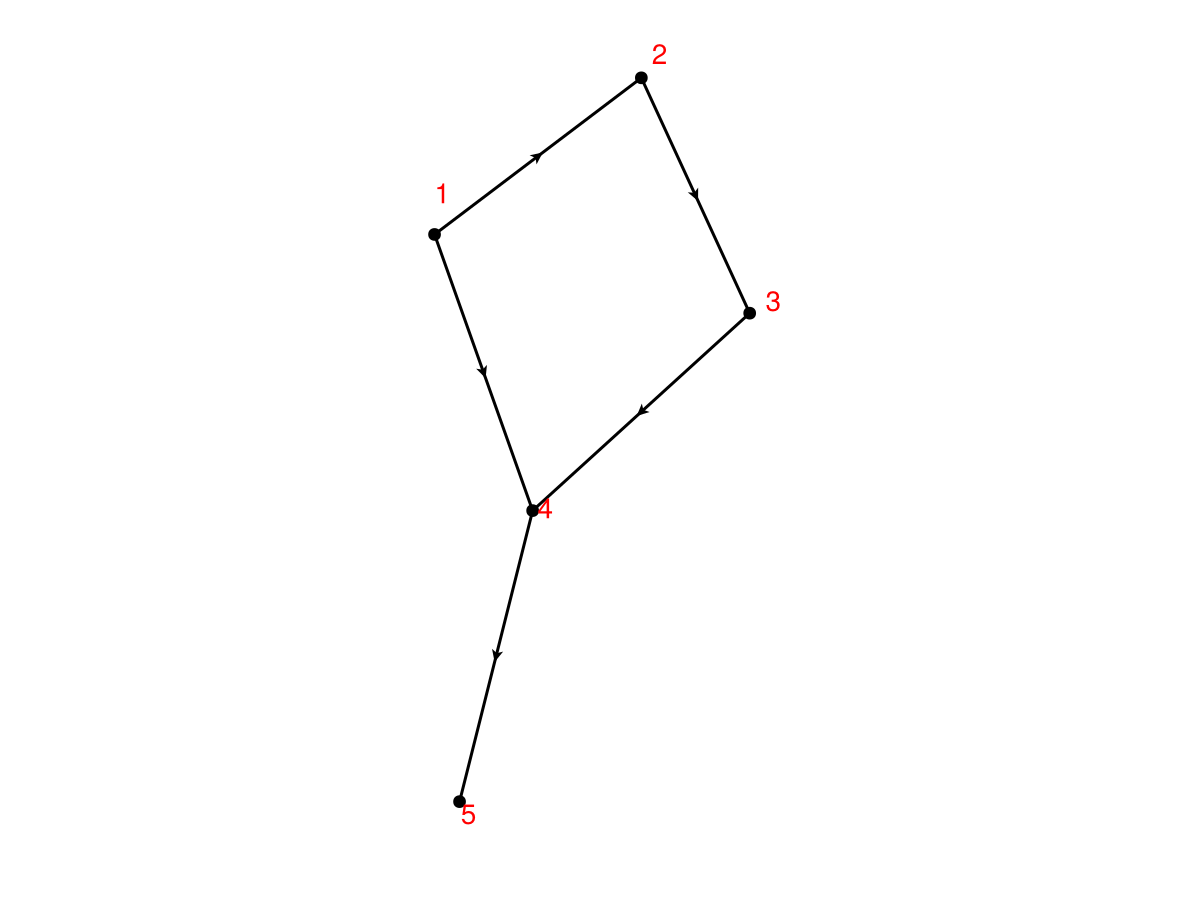

In [76]:
#Modelo 5
pgd1 = (U = rand(1000))
pgd2 = (Z = rand(1000) + pgd1)
pgd3 = (X = rand(1000) + 0.5 * pgd2 )
pgd4 = (M = rand(1000) + 5 * pgd1 + pgd3 * 2)
pgd5 = (Y = rand(1000) + 0.5 * pgd4)

matrix_data_all = [DataFrame(Y = pgd5) DataFrame(X = pgd3) DataFrame(Z =pgd2) DataFrame(M = pgd4) DataFrame(U = pgd1)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X + Z + M), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([(1,2),(2,3),(3,4),(1,4),(4,5)])
g = SimpleDiGraph(el)
plotgraph(g)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  2.22594   0.116576   19.09    <1e-68    1.99717    2.4547
X            2.79109   0.0716302  38.97    <1e-99    2.65053    2.93165
───────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z + M

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|

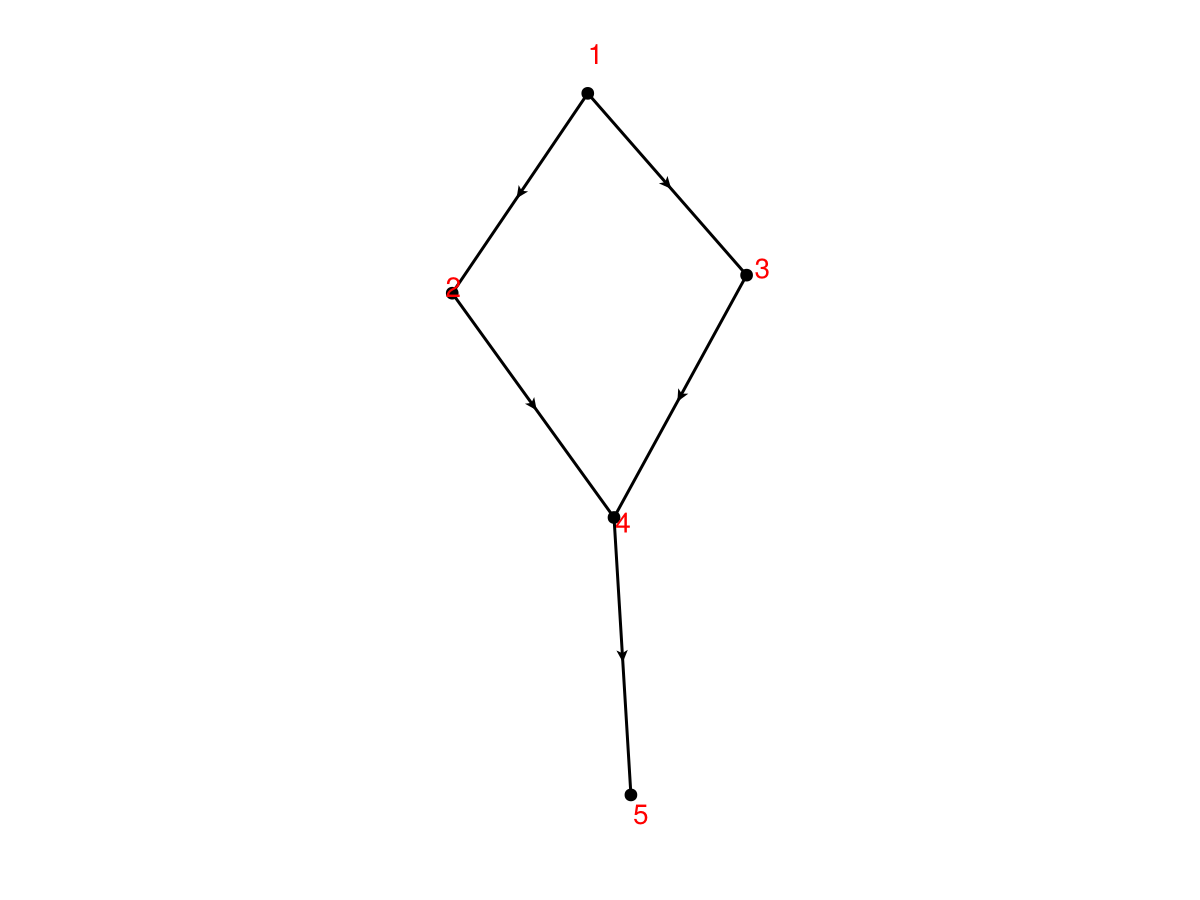

In [77]:
#Modelo 6
pgd1 = (U = rand(1000))
pgd2 = (Z = rand(1000) + pgd1)
pgd3 = (X = rand(1000) + 2 * pgd1 )
pgd4 = (M = rand(1000) + 3 * pgd1 + pgd2 * 4)
pgd5 = (Y = rand(1000) + 1 * pgd4)

matrix_data_all = [DataFrame(Y = pgd5) DataFrame(X = pgd3) DataFrame(Z =pgd2) DataFrame(M = pgd4) DataFrame(U = pgd1)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X + Z + M), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([(1,2),(1,3),(2,4),(3,4),(4,5)])
g = SimpleDiGraph(el)
plotgraph(g)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  1.02153    0.0576604  17.72    <1e-60   0.90838    1.13468
X            0.792173   0.0363468  21.79    <1e-85   0.720848   0.863497
────────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|

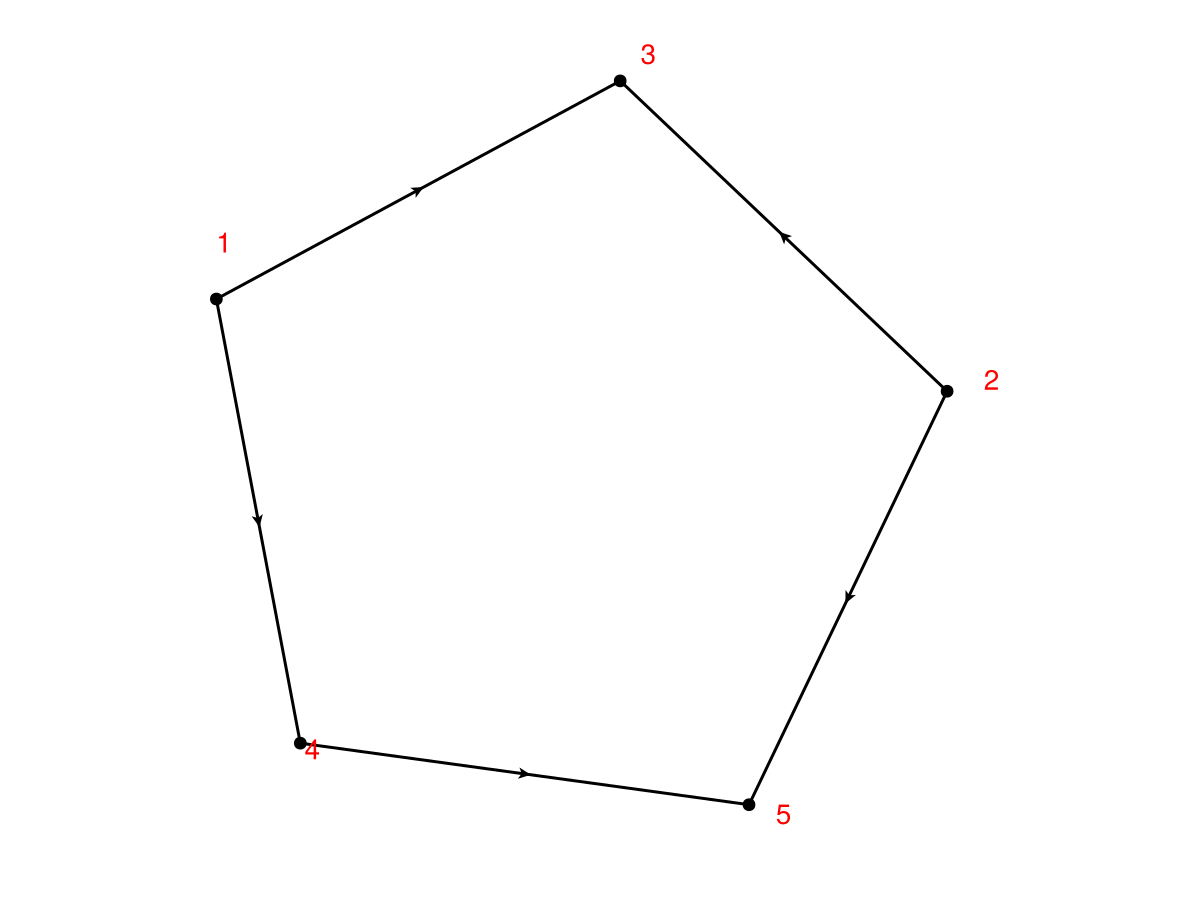

In [81]:
#Modelo 7
pgd1 = (U = rand(1000))
pgd2 = (M = rand(1000))
pgd3 = (Z = rand(1000) + 1 * pgd1 + pgd2)
pgd4 = (X = rand(1000) + 2 * pgd1)
pgd5 = (Y = rand(1000) + pgd4 + 0.5*pgd2)

matrix_data_all = [DataFrame(Y = pgd5) DataFrame(X = pgd3) DataFrame(Z =pgd2) DataFrame(M = pgd4) DataFrame(U = pgd1)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X + Z), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([(1,4),(1,3),(2,3),(2,5),(4,5)])
g = SimpleDiGraph(el)
plotgraph(g)

In [ ]:
#Modelo 8
pgd1 = (U = rand(1000))
pgd2 = (M = rand(1000))
pgd3 = (Z = rand(1000) + 1 * pgd1 + pgd2)
pgd4 = (X = rand(1000) + 2 * pgd1)
pgd5 = (Y = rand(1000) + pgd4 + 0.5*pgd2)

matrix_data_all = [DataFrame(Y = pgd5) DataFrame(X = pgd3) DataFrame(Z =pgd2) DataFrame(M = pgd4) DataFrame(U = pgd1)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X + Z), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([(1,4),(1,3),(2,3),(2,5),(4,5)])
g = SimpleDiGraph(el)
plotgraph(g)